In [1]:
!pip install scikit-image

In [1]:
import kagglehub
classification_roi_path = kagglehub.dataset_download('shrinarayanpandeyx/classification-roi')
print(classification_roi_path)

/kaggle/input/classification-roi


In [7]:
import pandas as pd 

In [8]:
import torch

import torchvision

from torchvision import datasets, transforms

import numpy as np

import matplotlib.pyplot as plt

## Transformer function for augmented and actual dataset

In [9]:
transformAug = transforms.Compose([transforms.Resize(224),

                                transforms.CenterCrop(224),

                                transforms.ColorJitter(brightness=2),

                                transforms.RandomResizedCrop(size=(224, 224), antialias=True),

                                transforms.RandomHorizontalFlip(p=0.5),

                                transforms.RandomVerticalFlip(p=0.5),

                                transforms.ToTensor(),

                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])

transform = transforms.Compose(

    [transforms.Resize(224),

     transforms.CenterCrop(224),

     transforms.ToTensor()])

In [10]:
train_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/train/', transform=transformAug)

test_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/test/', transform=transform)

val_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/val/', transform=transform)



# train_aug_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/train/', transform=transformAug)

# test_aug_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/test/', transform=transform)

# val_aug_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/val/', transform=transform)

In [12]:
batch_size = 32

## Loading data using DataLoader

In [13]:
trainloader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)



trainloaderAug = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

testloaderAug = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

valloaderAug = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

In [14]:
classes = ('Melignant', 'Benign')

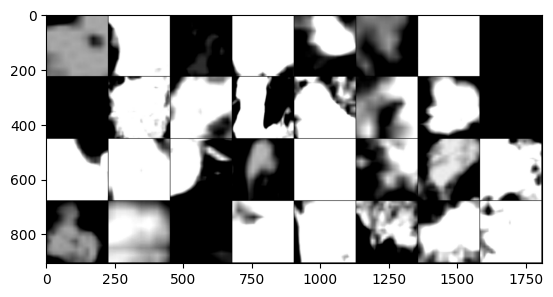

Benign Benign Melignant Melignant Benign Benign Benign Benign Benign Benign Benign Benign Benign Melignant Benign Benign Benign Melignant Benign Benign Benign Benign Benign Benign Benign Benign Benign Melignant Benign Benign Benign Melignant


In [20]:
def imshow(img):

    npimg = img.numpy()

    # print(img.shape)

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.show()



dataiter = iter(trainloader)

images, labels = next(dataiter)



imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
def imshow(img):

    npimg = img.numpy()

    # print(img.shape)

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.show()



dataiter = iter(trainloaderAug)

images, labels = next(dataiter)



imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

NameError: name 'trainloaderAug' is not defined

In [21]:
from collections import Counter

print(dict(Counter(sample_tup[1] for sample_tup in val_ds.imgs)))

{0: 408, 1: 1581}


# Loading VGG 16 Model

In [22]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 217MB/s] 


In [23]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch

from PIL import Image

import torchvision.transforms as transforms



input_image = Image.open('/kaggle/input/classification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg').convert('RGB')



preprocess = transforms.Compose([

    transforms.Resize(256),

    transforms.CenterCrop(224),

    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])



input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0)



if torch.cuda.is_available():

    input_batch = input_batch.to('cuda')

    model.to('cuda')



model.eval()  # Ensures the model is in evaluation mode

with torch.no_grad():

    output = model(input_batch)



# Process 'output' if needed


NameError: name 'model' is not defined

In [ ]:
print(output)

In [ ]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)

print(probabilities)

## plot the pixel value range from an image

In [25]:
import matplotlib.pyplot as plt

import numpy as np

from PIL import Image

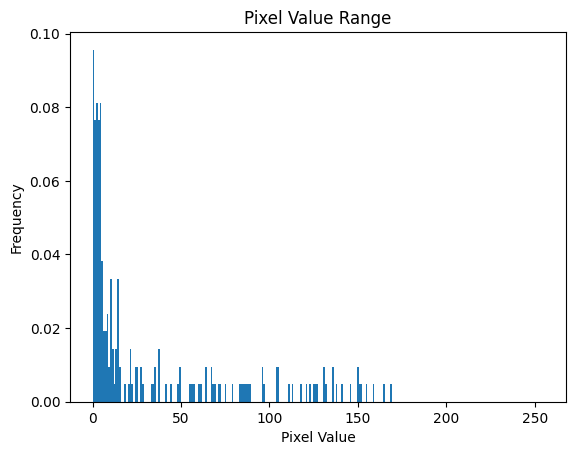

In [26]:
image_path = '/kaggle/input/classification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'

image = Image.open(image_path).convert('L') 

image_array = np.array(image)



plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)

plt.title('Pixel Value Range')

plt.xlabel('Pixel Value')

plt.ylabel('Frequency')

plt.show()

## Ploting HOG visualizatio graph of Image

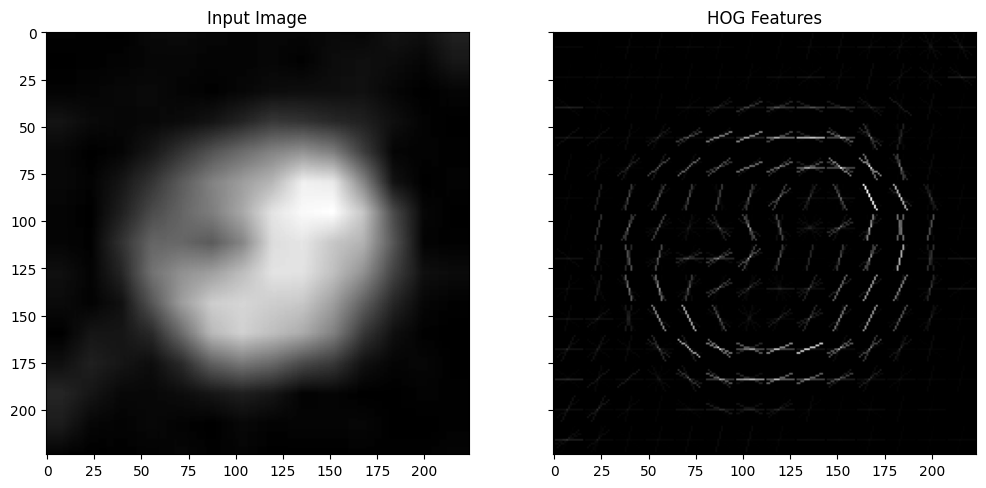

In [27]:
from skimage.feature import hog

from skimage import data, exposure

import matplotlib.pyplot as plt

from PIL import Image



image_path = '/kaggle/input/classification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'

input_image = Image.open(image_path).convert('L')

preprocess = transforms.Compose([

    transforms.Resize(224),

    transforms.CenterCrop(224),

    transforms.ToTensor()

])

image_tensor = preprocess(input_image)

image_numpy = image_tensor.numpy().squeeze()



hog_features, hog_image = hog(image_numpy, pixels_per_cell=(16, 16),

                              cells_per_block=(2, 2), visualize=True)



fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)



ax[0].imshow(image_numpy, cmap=plt.cm.gray)

ax[0].set_title('Input Image')



hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)

ax[1].set_title('HOG Features')



plt.show()


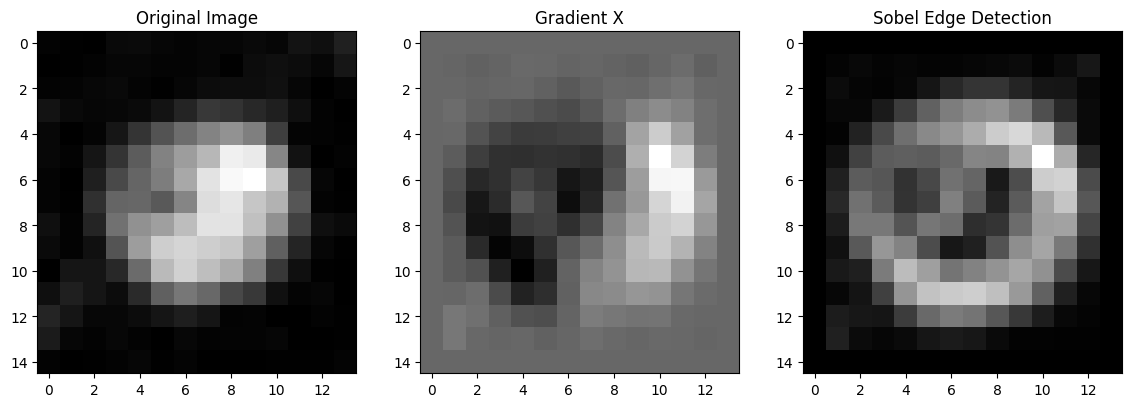

In [28]:
import numpy as np

import cv2

import matplotlib.pyplot as plt



def sobel_operator(image_path):

    image_path = '/kaggle/input/classification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'

    image = Image.open(image_path).convert('L')



    img_array = np.array(image)

    

    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])



    rows, cols = image_array.shape



    Ix = np.zeros((rows, cols))

    Iy = np.zeros((rows, cols))

    G = np.zeros((rows, cols))



    for i in range(1, rows-1):

        for j in range(1, cols-1):

            

            Ix[i, j] = np.sum(np.multiply(Kx, image_array[i-1:i+2, j-1:j+2]))

            Iy[i, j] = np.sum(np.multiply(Ky, image_array[i-1:i+2, j-1:j+2]))

            G[i, j] = np.sqrt(Ix[i, j]**2 + Iy[i, j]**2)



    G = (G / G.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 3, 1)

    plt.imshow(image, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 3, 2)

    plt.imshow(Ix, cmap='gray')

    plt.title('Gradient X')

    plt.subplot(1, 3, 3)

    plt.imshow(G, cmap='gray')

    plt.title('Sobel Edge Detection')

    plt.show()



sobel_operator('/kaggle/input/classification-roi/test/Benign/BreaDM-Be-1914/VIBRANT/p-031.jpg')


In [22]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=7d9dd972736eca13f57185bb50f8eaa681c2e29fc1d380ce446d3b1076bd4c3e
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [29]:
%matplotlib inline

# Visualization

import matplotlib as mpl

import matplotlib.pyplot as plt



# Linear algebra operations

import numpy as np



# Image IO

import imageio

import utils


ModuleNotFoundError: No module named 'utils'

In [30]:
import imageio



ht = np.array([[1, 2, 1]])





hc = np.array([[1, 0, -1]])





Hx = ht.T*hc

Hy = hc.T*ht



print(Hx, end=' Hx\n\n')

print(Hy, end=' Hy\n\n')

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] Hx

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] Hy



In [31]:
def convolve(x, h):

    xh, xw = x.shape

    hh, hw = h.shape

    rh, rw = np.array(h.shape)//2

    output = np.zeros(x.shape)

    for n1 in range(rh, xh-rh):

        for n2 in range(rw, xw-rw):

            value = 0

            for k1 in range(hh):

                for k2 in range(hw):

                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]

            output[n1, n2] = value

    return output

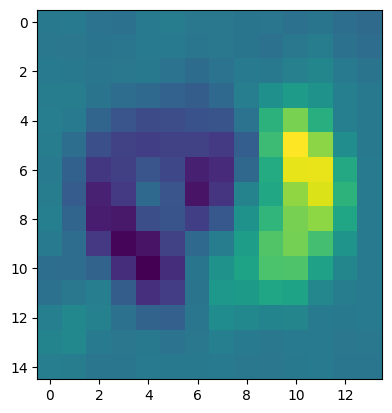

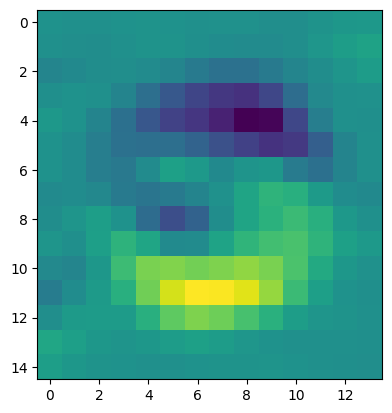

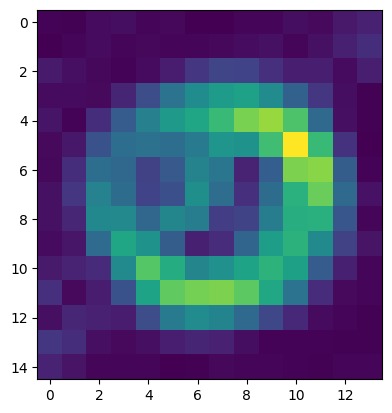

In [32]:
img_in = Image.open(image_path).convert('L')


r=1

img_pad = np.pad(

    img_in,

    ((r, r), (r, r)),

    'edge'

)



# Convolution

Gx = convolve(img_pad, Hx)[r:-r, r:-r]

plt.imshow(Gx)

plt.show()



Gy = convolve(img_pad, Hy)[r:-r, r:-r]

plt.imshow(Gy)

plt.show()



G = np.sqrt( Gy*Gy + Gx*Gx)

plt.imshow(G)

plt.show()

# Mean_Variance_Median Binary Pointer

In [33]:
def sobel_operators(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= center_pixel:

                    binary_pattern += 2**ind

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Variance-based LBP Image')

    plt.show()




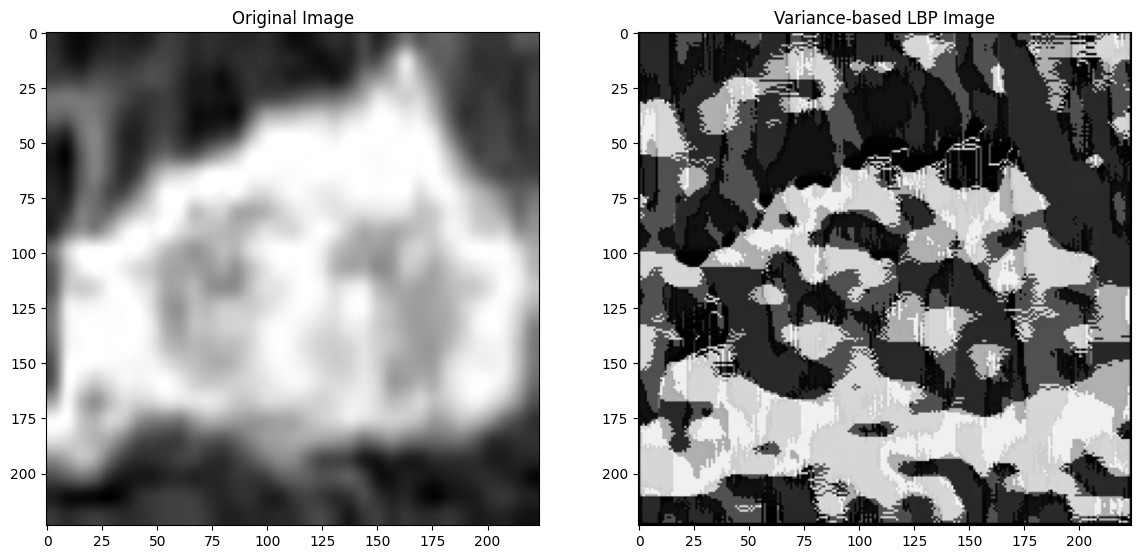

In [34]:
sobel_operators('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

In [ ]:
def variance_based_lbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            variance = np.var(neighborhood)

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= center_pixel + variance:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Variance-based LBP Image')

    plt.show()



variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


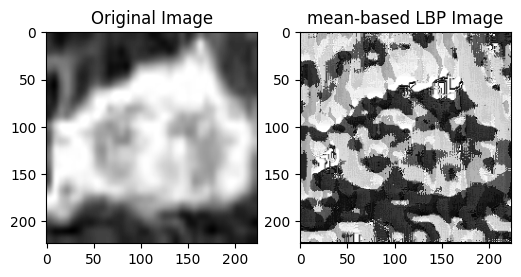

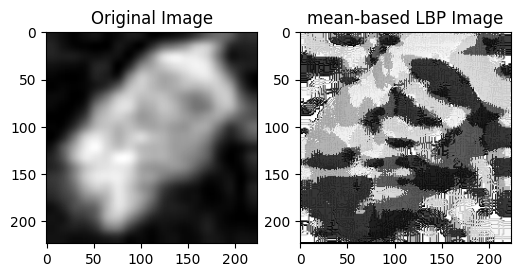

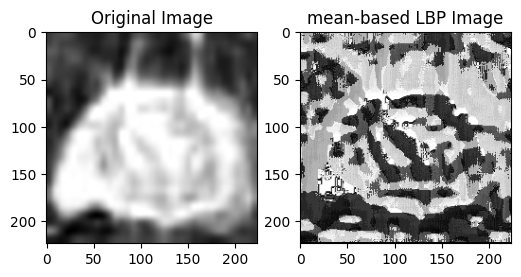

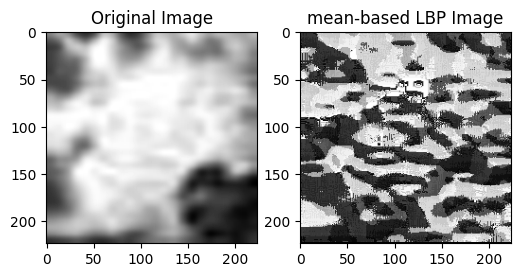

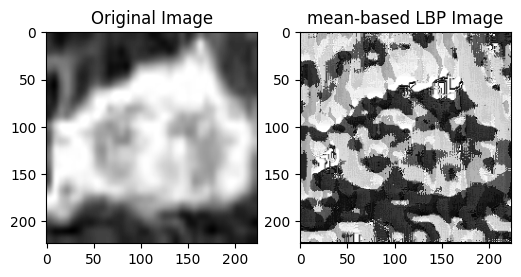

In [35]:
def mean_based_lbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            mean = np.mean(neighborhood)

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= mean:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('mean-based LBP Image')

    plt.show()



mean_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

mean_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

mean_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

mean_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

mean_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

In [36]:
def median_based_lbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            median = np.median(neighborhood)

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= median:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('median LBP Image')

    plt.show()



median_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

median_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

median_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

median_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

median_based_lbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg'

In [ ]:
def mvmbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            median = np.median(neighborhood)

            mean = np.mean(neighborhood)

            variance = np.var(neighborhood)

            threshold =  (median + np.sqrt(variance) + mean)/3

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= threshold:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('mvmbp Image')

    plt.show()



mvmbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

mvmbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

mvmbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

mvmbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

mvmbp('/kaggle/input/classification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


# GLCM ( gray scale coccurrence matrix)

In [37]:
import numpy as np

import skimage.io as io

import skimage.color as color

import skimage.feature as feature



# Load your image

image = io.imread('/kaggle/input/classification-roi/test/Malignant/BreaDM-Ma-1908/SUB3/p-044.jpg')



# Convert to grayscale if not already

if len(image.shape) == 3:

    image = color.rgb2gray(image)



# Convert the grayscale image to uint8

image = (image * 255).astype(np.uint8)



# Define distances and angles

distances = [1, 2, 3]

angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]



# Compute the GLCM

glcm = feature.graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)



# Compute properties

contrast = feature.graycoprops(glcm, 'contrast')

dissimilarity = feature.graycoprops(glcm, 'dissimilarity')

homogeneity = feature.graycoprops(glcm, 'homogeneity')

energy = feature.graycoprops(glcm, 'energy')

correlation = feature.graycoprops(glcm, 'correlation')

ASM = feature.graycoprops(glcm, 'ASM')



# Print properties

print('Contrast:\n', contrast)

print('Dissimilarity:\n', dissimilarity)

print('Homogeneity:\n', homogeneity)

print('Energy:\n', energy)

print('Correlation:\n', correlation)

print('ASM:\n', ASM)


Contrast:
 [[1686.42279412 2548.7578125  1552.125      2833.28125   ]
 [5100.13333333 2548.7578125  3788.7254902  2833.28125   ]
 [8812.08823529 7457.56888889 5950.64705882 8287.72888889]]
Dissimilarity:
 [[28.03308824 33.8984375  22.55147059 35.78125   ]
 [50.88627451 33.8984375  39.09411765 35.78125   ]
 [68.55042017 62.58222222 51.57142857 66.28888889]]
Homogeneity:
 [[0.09826406 0.10716989 0.12962513 0.11304148]
 [0.08813006 0.10716989 0.12181414 0.11304148]
 [0.08217468 0.09619171 0.0818929  0.08963995]]
Energy:
 [[0.0719969  0.07724109 0.07498558 0.07411588]
 [0.06758309 0.07724109 0.07409586 0.07411588]
 [0.06420465 0.07516238 0.06253309 0.06710964]]
Correlation:
 [[0.89639481 0.84167908 0.90755972 0.82380426]
 [0.68183317 0.84167908 0.77520841 0.82380426]
 [0.45646148 0.52045684 0.64667892 0.46912593]]
ASM:
 [[0.00518355 0.00596619 0.00562284 0.00549316]
 [0.00456747 0.00596619 0.0054902  0.00549316]
 [0.00412224 0.00564938 0.00391039 0.0045037 ]]


In [8]:
import torch

import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)

vgg16.eval()

print(vgg16)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 229MB/s]  


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
import torch
import torch.nn as nn
import torchvision.models as models


class Custom(nn.Module):

    def __init__(self, num_classes=2):
        super(Custom ,self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # Pass the input through the features layer
        x = self.features(x)
        # Use the avgpool layer
        x = self.avgpool(x)
        # Reshape the output to a 2D tensor
        x = torch.flatten(x, 1)
        # Pass the reshaped output to the custom classifier
        x = self.classifier(x)
        return x

model = Custom(num_classes=2)
print(model)


Custom(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [8]:
import numpy as np
import torch
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)

        self.val_loss_min = val_loss


In [9]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Define your model, assuming it's already defined as in your previous message

# model = Custom(num_classes=2)  # Make sure to import and define your model correctly

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Training Function

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')


In [10]:
# Validation Function

def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value


In [14]:
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "vgg16"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001
for epoch in range(1, num_epochs + 1):
    train(epoch, model, num_epochs, trainloader, criterion, l2_decay, lr)

    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(model, valloader)

    state_dict = model.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)

    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    early_stop(val_loss, model)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))

    if early_stop.early_stop:
        print("Early stopping")
        break

# Load the best model
# model.load_state_dict(torch.load(os.path.join(model_save_dir, f'{model_name}_{epoch}.pth')))
print("Model loaded with the best validation loss")


Epoch 2/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 73.55%


Confusion Matrix:
[[   6  402]
 [  52 1529]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8734
Validation Loss: 0.0013, Accuracy: 77.17%
Validation loss decreased (inf --> 0.001276).  Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 75.18%


Confusion Matrix:
[[ 210  198]
 [ 344 1237]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8460
Validation Loss: 0.0019, Accuracy: 72.75%
EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 75.85%


Confusion Matrix:
[[  99  309]
 [  22 1559]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9109
Validation Loss: 0.0010, Accuracy: 83.36%
Validation loss decreased (0.001276 --> 0.001026).  Saving model ...


Epoch 5/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 76.35%


Confusion Matrix:
[[ 106  302]
 [  29 1552]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9308
Validation Loss: 0.0018, Accuracy: 83.36%
EarlyStopping counter: 1 out of 20


Epoch 6/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 76.95%


Confusion Matrix:
[[ 231  177]
 [ 183 1398]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9182
Validation Loss: 0.0007, Accuracy: 81.90%
Validation loss decreased (0.001026 --> 0.000667).  Saving model ...


Epoch 7/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 77.02%


Confusion Matrix:
[[ 172  236]
 [ 134 1447]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9070
Validation Loss: 0.0007, Accuracy: 81.40%
EarlyStopping counter: 1 out of 20


Epoch 8/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 77.42%


Confusion Matrix:
[[327  81]
 [631 950]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7333
Validation Loss: 0.0015, Accuracy: 64.20%
EarlyStopping counter: 2 out of 20


Epoch 9/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 77.75%


Confusion Matrix:
[[295 113]
 [653 928]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7207
Validation Loss: 0.0015, Accuracy: 61.49%
EarlyStopping counter: 3 out of 20


Epoch 10/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 77.89%


Confusion Matrix:
[[ 200  208]
 [ 156 1425]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9164
Validation Loss: 0.0025, Accuracy: 81.70%
EarlyStopping counter: 4 out of 20


Epoch 11/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 78.77%


Confusion Matrix:
[[ 229  179]
 [ 186 1395]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9233
Validation Loss: 0.0006, Accuracy: 81.65%
Validation loss decreased (0.000667 --> 0.000619).  Saving model ...


Epoch 12/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.46%


Confusion Matrix:
[[ 242  166]
 [ 265 1316]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8937
Validation Loss: 0.0012, Accuracy: 78.33%
EarlyStopping counter: 1 out of 20


Epoch 13/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.94%


Confusion Matrix:
[[ 236  172]
 [ 270 1311]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8837
Validation Loss: 0.0004, Accuracy: 77.78%
Validation loss decreased (0.000619 --> 0.000410).  Saving model ...


Epoch 14/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.83%


Confusion Matrix:
[[ 239  169]
 [ 268 1313]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8875
Validation Loss: 0.0011, Accuracy: 78.03%
EarlyStopping counter: 1 out of 20


Epoch 15/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.80%


Confusion Matrix:
[[ 255  153]
 [ 424 1157]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8147
Validation Loss: 0.0010, Accuracy: 70.99%
EarlyStopping counter: 2 out of 20


Epoch 16/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.88%


Confusion Matrix:
[[ 258  150]
 [ 391 1190]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8452
Validation Loss: 0.0015, Accuracy: 72.80%
EarlyStopping counter: 3 out of 20


Epoch 17/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.68%


Confusion Matrix:
[[ 269  139]
 [ 564 1017]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7464
Validation Loss: 0.0018, Accuracy: 64.66%
EarlyStopping counter: 4 out of 20


Epoch 18/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.90%


Confusion Matrix:
[[ 250  158]
 [ 373 1208]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8434
Validation Loss: 0.0006, Accuracy: 73.30%
EarlyStopping counter: 5 out of 20


Epoch 19/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.21%


Confusion Matrix:
[[ 251  157]
 [ 353 1228]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8553
Validation Loss: 0.0006, Accuracy: 74.36%
EarlyStopping counter: 6 out of 20


Epoch 20/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 80.57%


Confusion Matrix:
[[ 262  146]
 [ 505 1076]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7857
Validation Loss: 0.0022, Accuracy: 67.27%
EarlyStopping counter: 7 out of 20


Epoch 21/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.63%


Confusion Matrix:
[[ 250  158]
 [ 447 1134]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8066
Validation Loss: 0.0015, Accuracy: 69.58%
EarlyStopping counter: 8 out of 20


Epoch 22/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 81.39%


Confusion Matrix:
[[ 253  155]
 [ 481 1100]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7850
Validation Loss: 0.0020, Accuracy: 68.02%
EarlyStopping counter: 9 out of 20


Epoch 23/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.63%


Confusion Matrix:
[[ 254  154]
 [ 458 1123]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8030
Validation Loss: 0.0007, Accuracy: 69.23%
EarlyStopping counter: 10 out of 20


Epoch 24/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.81%


Confusion Matrix:
[[ 251  157]
 [ 428 1153]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8128
Validation Loss: 0.0017, Accuracy: 70.59%
EarlyStopping counter: 11 out of 20


Epoch 25/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.82%


Confusion Matrix:
[[ 247  161]
 [ 392 1189]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8345
Validation Loss: 0.0020, Accuracy: 72.20%
EarlyStopping counter: 12 out of 20


Epoch 26/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.70%


Confusion Matrix:
[[ 253  155]
 [ 444 1137]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8053
Validation Loss: 0.0017, Accuracy: 69.88%
EarlyStopping counter: 13 out of 20


Epoch 27/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.47%


Confusion Matrix:
[[ 252  156]
 [ 406 1175]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8292
Validation Loss: 0.0016, Accuracy: 71.74%
EarlyStopping counter: 14 out of 20


Epoch 28/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.55%


Confusion Matrix:
[[ 247  161]
 [ 366 1215]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8442
Validation Loss: 0.0006, Accuracy: 73.50%
EarlyStopping counter: 15 out of 20


Epoch 29/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.33%


Confusion Matrix:
[[ 248  160]
 [ 426 1155]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8160
Validation Loss: 0.0032, Accuracy: 70.54%
EarlyStopping counter: 16 out of 20


Epoch 30/50: 100%|██████████| 639/639 [02:51<00:00,  3.72batch/s]

Train Accuracy: 81.11%


Confusion Matrix:
[[ 248  160]
 [ 409 1172]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8277
Validation Loss: 0.0008, Accuracy: 71.39%
EarlyStopping counter: 17 out of 20


Epoch 31/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.41%


Confusion Matrix:
[[ 248  160]
 [ 395 1186]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8321
Validation Loss: 0.0021, Accuracy: 72.10%
EarlyStopping counter: 18 out of 20


Epoch 32/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.65%


Confusion Matrix:
[[ 252  156]
 [ 422 1159]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8212
Validation Loss: 0.0012, Accuracy: 70.94%
EarlyStopping counter: 19 out of 20


Epoch 33/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.52%


Confusion Matrix:
[[ 250  158]
 [ 379 1202]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8440
Validation Loss: 0.0017, Accuracy: 73.00%
EarlyStopping counter: 20 out of 20
Early stopping
Model loaded with the best validation loss


In [ ]:
/kaggle/working/model/tumor_classification

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Load the pretrained resnet18 model
resnet18_pretrained = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

class Resnet18(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet18, self).__init__()
        model_resnet18 = resnet18_pretrained
        
        self.conv1 = model_resnet18.conv1
        self.bn1 = model_resnet18.bn1
        self.relu = model_resnet18.relu
        self.maxpool = model_resnet18.maxpool
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4
        self.avgpool = model_resnet18.avgpool
        self.__features = model_resnet18.fc.in_features
        
        self.fc = nn.Linear(self.__features, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Create an instance of the custom Resnet18 model
customResnet18 = Resnet18(num_classes=2)
customResnet18 = customResnet18.to("cuda")

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s] 


In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')

def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "Resnet18"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001
for epoch in range(1, num_epochs + 1):
    train(epoch, customResnet18, num_epochs, trainloader, criterion, l2_decay, lr)
    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(customResnet18, valloader)
    state_dict = customResnet18.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    early_stop(val_loss, customResnet18)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))

    if early_stop.early_stop:
        print("Early stopping")
        break
print("Model loaded with the best validation loss")

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Load the pretrained resnet50 model
resnet50_pretrained = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
device = "cuda"
class Resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet50, self).__init__()
        model_resnet50 = resnet50_pretrained
        
        self.conv1 = model_resnet50.conv1
        self.bn1 = model_resnet50.bn1
        self.relu = model_resnet50.relu
        self.maxpool = model_resnet50.maxpool
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4
        self.avgpool = model_resnet50.avgpool
        self.__features = model_resnet50.fc.in_features
        
        self.fc = nn.Linear(self.__features, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Create an instance of the custom Resnet50 model
customResnet50 = Resnet50(num_classes=2)
customResnet50 = customResnet50.to("cuda")

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 212MB/s] 


In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')

def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "Resnet50"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001

for epoch in range(1, num_epochs + 1):
    train(epoch, customResnet50, num_epochs, trainloader, criterion, l2_decay, lr)
    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(customResnet50, valloader)
    state_dict = customResnet50.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    early_stop(val_loss, customResnet50)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))
    if early_stop.early_stop:
        print("Early stopping")
        break
# Load the best model
customResnet50.load_state_dict(torch.load(os.path.join(model_save_dir, f'{model_name}_{epoch}.pth')))
print("Model loaded with the best validation loss")

In [4]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import torch
import numpy as np
import torch.nn.functional as F

def test(model, test_dataloader):
    name = 'test'
    len_test_dataloader = len(test_dataloader.dataset)
    model.eval()
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_targets = []  # To store all actual labels
    labels = ['benign', 'malignant']

    for data, target in test_dataloader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        test_output = model(data)
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()
        pred = test_output.data.max(1)[1]
        all_predictions.append(pred.cpu().numpy())
        all_targets.append(target.cpu().numpy())
        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    all_predictions = [i for item in all_predictions for i in item]
    all_targets = [i for item in all_targets for i in item]
    
    # Classification metrics -> accuracy, f1 score
    print(metrics.classification_report(all_targets, all_predictions, labels=range(2), target_names=labels, digits=4))
    
    # Confusion matrix
    cm = metrics.confusion_matrix(all_targets, all_predictions, labels=range(2))
    num_classes = test_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]

    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")
    test_loss /= len_test_dataloader
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, test_loss, correct, len_test_dataloader,
        100. * correct / len_test_dataloader))

    return 100. * correct / len_test_dataloader, test_loss, auc_value


In [5]:

model.load_state_dict(torch.load(os.path.join('/kaggle/input/vgg16/pytorch/default/1/vgg16_4.pth')))


NameError: name 'model' is not defined

In [24]:
test(model , testloader) 

              precision    recall  f1-score   support

      benign     0.6896    0.3153    0.4327      1938
   malignant     0.7775    0.9440    0.8527      4913

    accuracy                         0.7662      6851
   macro avg     0.7336    0.6296    0.6427      6851
weighted avg     0.7527    0.7662    0.7339      6851

Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7998

test set: Average loss: 0.4773, Accuracy: 5249/6851 (76.62%)



(tensor(76.6166), 0.47725808991078755, 0.7997752219895533)

In [15]:
model2 = Resnet18(num_classes=2)
model2 = model2.to("cuda")
model2.load_state_dict(torch.load(os.path.join('/kaggle/input/resnet18/pytorch/default/1/Resnet18_7.pth')))
test(model2 , testloader) 

/tmp/ipykernel_30/2542109334.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(os.path.join('/kaggle/input/resnet18/pytorch/default/1/Res

              precision    recall  f1-score   support

      benign     0.4690    0.7327    0.5719      1938
   malignant     0.8645    0.6727    0.7566      4913

    accuracy                         0.6897      6851
   macro avg     0.6667    0.7027    0.6643      6851
weighted avg     0.7526    0.6897    0.7044      6851

Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7662

test set: Average loss: 0.6451, Accuracy: 4725/6851 (68.97%)



(tensor(68.9680), 0.6451468711490267, 0.7662445225982666)

In [18]:
model3 = Resnet50(num_classes=2)
model3 = model3.to("cuda")
model3.load_state_dict(torch.load(os.path.join('/kaggle/input/resnet50/pytorch/default/1/Resnet50_3.pth')))
test(model3 , testloader) 

/tmp/ipykernel_30/4183626858.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model3.load_state_dict(torch.load(os.path.join('/kaggle/input/resnet50/pytorch/default/1/Res

              precision    recall  f1-score   support

      benign     0.5922    0.4623    0.5193      1938
   malignant     0.8048    0.8744    0.8382      4913

    accuracy                         0.7578      6851
   macro avg     0.6985    0.6684    0.6787      6851
weighted avg     0.7447    0.7578    0.7480      6851

Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7819

test set: Average loss: 0.5245, Accuracy: 5192/6851 (75.78%)



(tensor(75.7846), 0.5245384400586215, 0.781902628963784)

In [20]:
pip install gradio torch torchvision Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 111.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2
  Attempting uninstall: python-multipart
    Found existing installation: python-multipart 0.0.9
    Uninstalling python-multipart-0.0.9:
      Successfully uninstalled python-multipart-0.0.9
  Attempting uninstall: starlette
    Found existing installation: starlette 0.37.2
    Uninstalling starlette-0.37.2:
      Successfully uninstalled starlette-0.37.2
  Attempting uninstall: fastapi
    Found existing installation: f

In [22]:
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet50


def predict(image):
    # Load and preprocess the image
    if image is None:
        return None
    
    # Convert to RGB if needed
    image = Image.open(image).convert('RGB')
    image = transform(image).unsqueeze(0)
    image = image.to("cuda")
    # Load model
    loaded_model = model2
    
    # Make prediction
    with torch.no_grad():
        outputs = loaded_model(image)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        
    # Get prediction and confidence
    pred_class = "Malignant" if probabilities[1] > probabilities[0] else "Benign"
    confidence = float(max(probabilities)) * 100
    
    return {
        "Benign": float(probabilities[0]) * 100,
        "Malignant": float(probabilities[1]) * 100
    }

# Create Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="filepath"),
    outputs=gr.Label(num_top_classes=2),
    title="Breast Cancer Classification",
    description="Upload a breast cancer histopathology image to classify it as benign or malignant.",
    examples=["path_to_example_image1.jpg", "path_to_example_image2.jpg"]  # Add your example images
)

# Launch the app
if __name__ == "__main__":
    iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://923139a8e1361afa7a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
